In [ ]:
install.packages("ggplot2")
install.packages("readr")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("tidyr")
install.packages("datawizard")
install.packages("patchwork")
install.packages("lme4")
install.packages("reshape2")
install.packages("broom.mixed")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(readr)
library(dplyr)
library(tidyverse)
library(tidyr)
library(datawizard)
library(patchwork)
library(lme4)
library(reshape2)
library(broom.mixed)

In [ ]:
# Set plot size
options(repr.plot.width = 14, repr.plot.height = 8)

In [ ]:
# Read in the data
data <- read_csv("final_data.csv")

# Convert to dataframe
data <- as.data.frame(data)

# Factorize categorical variables
data <- data %>%
  mutate(
    PWS_ID = factor(PWS_ID),
    OWNER_TYPE = factor(OWNER_TYPE, levels = c("Public", "Private", "PPP")),
    COUNTY = factor(COUNTY),
    PWS_TYPE = recode(PWS_TYPE,
                      "NTNCS" = "NTNCWS",
                      "TNCS" = "TNCWS") %>%
               factor(level = c("CWS", "NTNCWS", "TNCWS")),
    SOURCE = factor(SOURCE, levels = c("GW", "SW", "UNK")),
    WHOLESALER = factor(WHOLESALER, levels = c("No", "Yes")),
    YEAR_FAC = factor(YEAR_FAC, levels = c("2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"))
  )

  # Numeric variables
num_vars_all <- c(
    "VIOLATIONS",
    "POPULATION",
    "FACILITIES",
    "SERV_CON",
    "MED_INCOME",
    "POV_RATE",
    "AVG_PRECIP",
    "AVG_TEMP",
    "PERCENT_REP"
)

# Numeric variables without VIOLATIONS
num_vars <- c(
    "VIOLATIONS",
    "POPULATION",
    "SERV_CON",
    "FACILITIES",
    "MED_INCOME",
    "POV_RATE",
    "AVG_PRECIP",
    "AVG_TEMP",
    "PERCENT_REP"
)

# Categorical variables
cat_vars <- c(
    "OWNER_TYPE",
    "PWS_TYPE",
    "SOURCE",
    "WHOLESALER"
)

# Combine the numeric and categorical variables
main_vars <- c(num_vars_all, cat_vars)

# Subset the dataframe
main_vars_subset <- datawizard::data_match(data, data[, main_vars])

Rows: 66770 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): PWS_ID, OWNER_TYPE, COUNTY, PWS_TYPE, SOURCE, WHOLESALER
dbl (15): YEAR_FULL, POPULATION, SERV_CON, FACILITIES, VIOLATIONS, SITE_VISI...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”


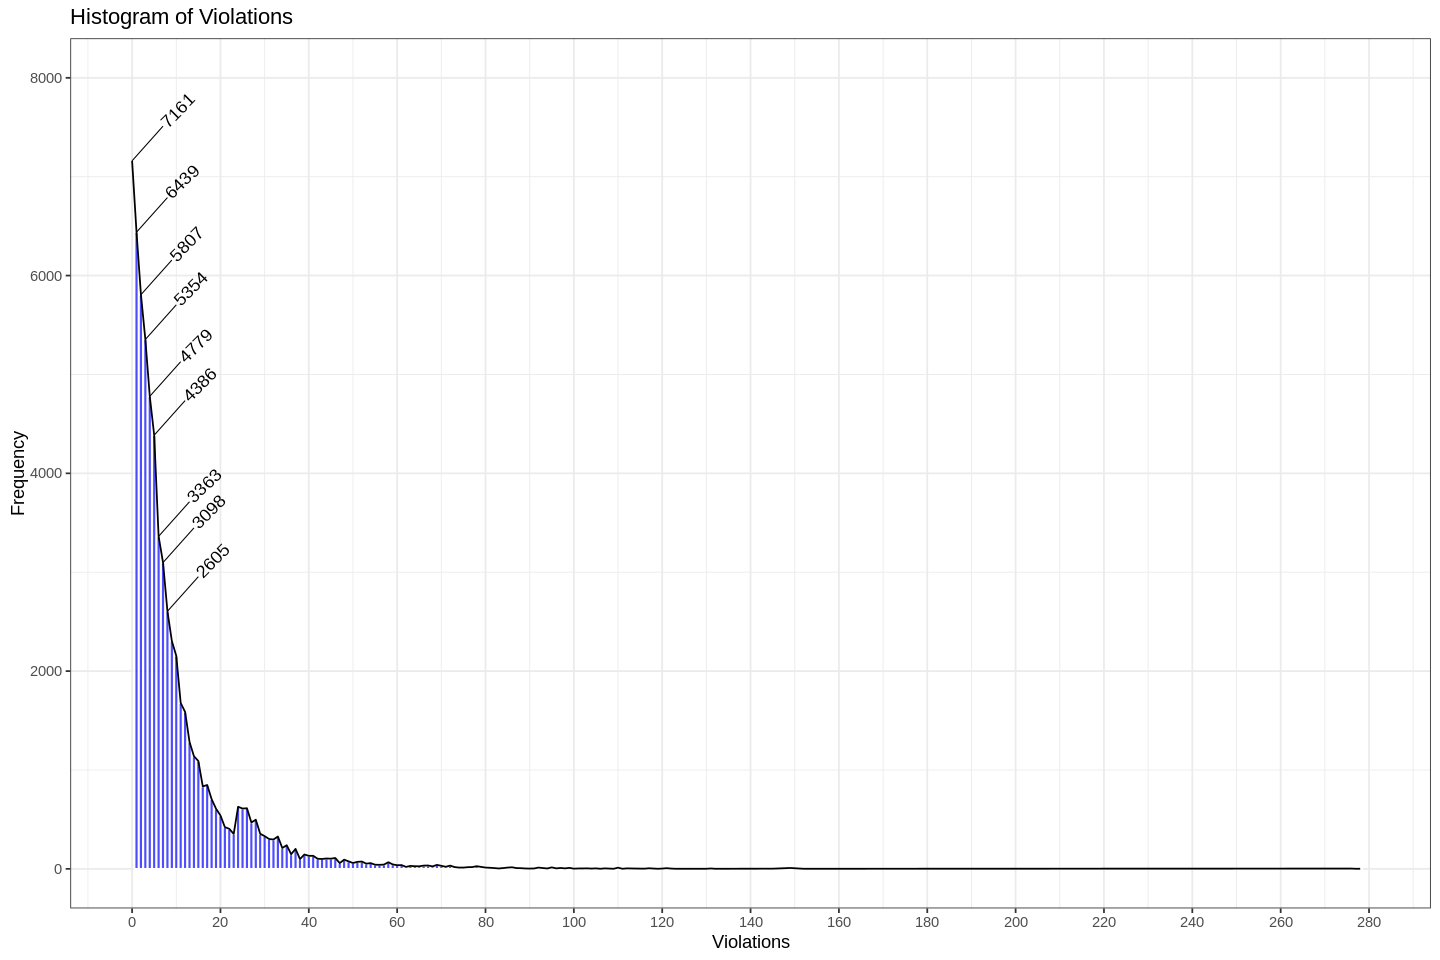

In [ ]:
# Set plot size
options(repr.plot.width = 12, repr.plot.height = 8)

# Create a frequency table
fr <- data %>%
  count(VIOLATIONS) %>%
  rename(violations = VIOLATIONS, freq = n)

# Adjust the plot
ggplot(fr, aes(x = violations, y = freq)) +
  geom_col(fill = "blue", color = "white", alpha = 0.7) +
  geom_line(aes(group = 1)) +
  geom_text(aes(label = ifelse(freq > 2500, freq, '')), vjust = 0.2, hjust = -1.2, angle = 45, check_overlap = TRUE) +
  geom_segment(aes(x = violations, xend = violations + 7, y = freq, yend = freq + 350),
               data = subset(fr, freq > 2500), size = 0.3) +
  theme_bw() +
  scale_y_continuous(limits = c(0, 8000)) +
  scale_x_continuous(limits = c(0, 280), breaks = seq(0, 280, by = 20)) +
  labs(title = "Histogram of Violations", x = "Violations", y = "Frequency") +
  theme(axis.title.y = element_text(angle = 90, vjust = 0.5))

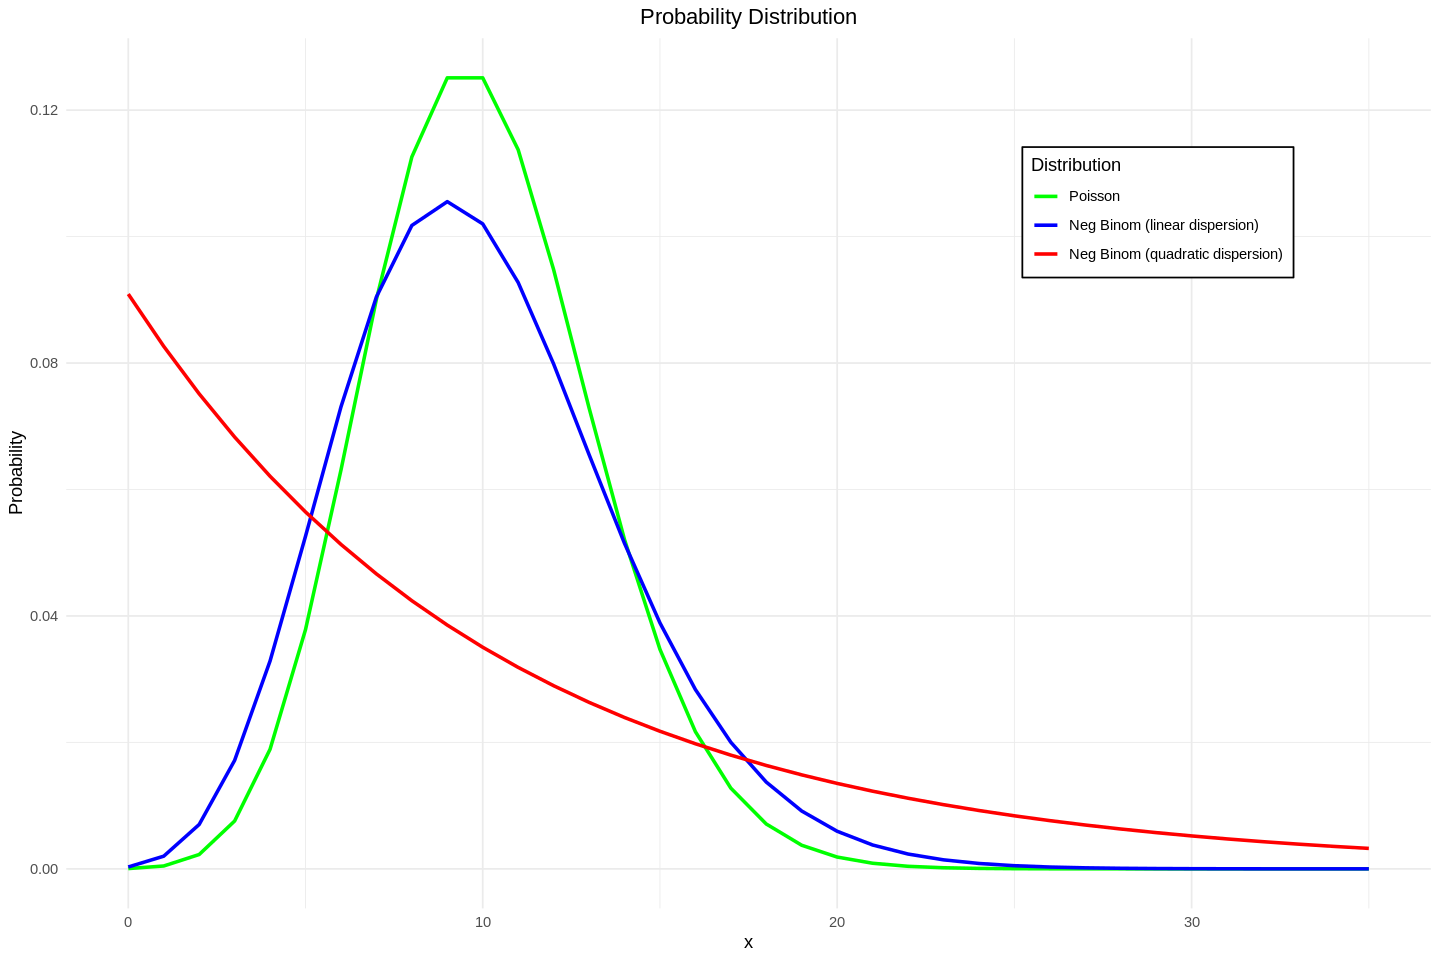

In [ ]:
# Define the parameters
lambda <- 10  # Mean for Poisson
alpha1 <- 0.5 # Dispersion parameter for Negative Binomial
alpha_quad <- 0.1 # Quadratic dispersion parameter

# Calculate the size and probability parameters for Negative Binomial
size1 <- lambda / alpha1
prob1 <- size1 / (size1 + lambda)

# Quadratic dispersion parameters
size_quad <- lambda / (alpha_quad * lambda^2)
prob_quad <- size_quad / (size_quad + lambda)

# Create x values
x_values <- 0:35

# Calculate theoretical densities
poisson_density <- dpois(x_values, lambda)
nbinom_density1 <- dnbinom(x_values, size = size1, prob = prob1)
nbinom_density_quad <- dnbinom(x_values, size = size_quad, prob = prob_quad)

# Create a dataframe for the theoretical distributions
theoretical_data <- data.frame(
  x = rep(x_values, 3),
  density = c(poisson_density, nbinom_density1, nbinom_density_quad),
  distribution = factor(rep(c("Poisson", "Neg Binom (linear dispersion)", "Neg Binom (quadratic dispersion)"), each = length(x_values)),
                        levels = c("Poisson", "Neg Binom (linear dispersion)", "Neg Binom (quadratic dispersion)"))
)

# Plot theoretical distributions
p <- ggplot(theoretical_data, aes(x = x, y = density, color = distribution)) +
  geom_line(size = 1) +
  labs(title = "Probability Distribution",
       x = "x",
       y = "Probability",
       color = "Distribution") +
  scale_color_manual(values = c("Poisson" = "green",
                                "Neg Binom (linear dispersion)" = "blue",
                                "Neg Binom (quadratic dispersion)" = "red")) +
  theme_minimal() +
  theme(legend.position = c(0.8, 0.8),
        legend.background = element_rect(fill = "white", color = "black"),
        plot.title = element_text(hjust = 0.5))

print(p)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (Days | Subject)
   Data: sleepstudy

REML criterion at convergence: 1743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9536 -0.4634  0.0231  0.4634  5.1793 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Subject  (Intercept) 612.10   24.741       
          Days         35.07    5.922   0.07
 Residual             654.94   25.592       
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  251.405      6.825  36.838
Days          10.467      1.546   6.771

Correlation of Fixed Effects:
     (Intr)
Days -0.138

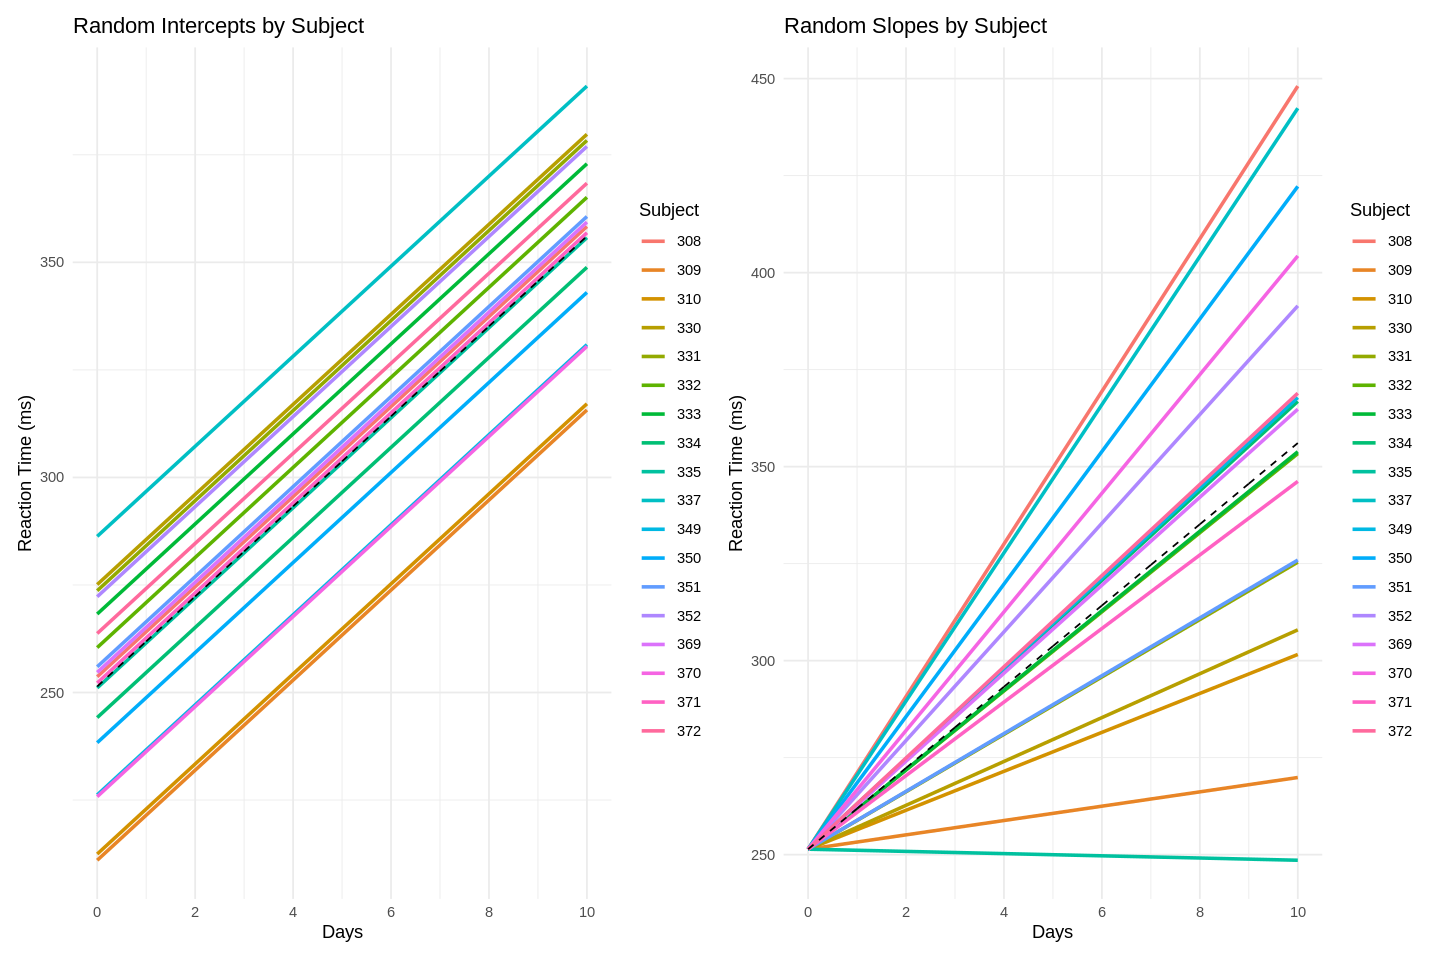

In [ ]:
# Load the sleepstudy dataset
data("sleepstudy", package = "lme4")

# Fit a linear mixed effects model
model <- lmer(Reaction ~ Days + (Days | Subject), data = sleepstudy)

# Summarize the model
summary(model)

# Extract fixed effects
fixed_effects <- fixef(model)

# Extract random effects
random_effects <- ranef(model)$Subject

# Prepare data for plotting random intercepts and slopes
random_intercepts <- data.frame(Subject = rownames(random_effects), Intercept = random_effects[["(Intercept)"]])
random_slopes <- data.frame(Subject = rownames(random_effects), Slope = random_effects[["Days"]])

# Create a dataset for the average fixed effect line
avg_line <- data.frame(
  Days = rep(0:10, each = nrow(random_intercepts)),
  Reaction = rep(fixed_effects[1], 11) + rep(fixed_effects[2], 11) * rep(0:10, each = nrow(random_intercepts)),
  Subject = rep(random_intercepts$Subject, each = 11)
)

# Create a dataset for the random intercept adjusted lines
intercept_lines <- random_intercepts %>%
  rowwise() %>%
  mutate(data = list(data.frame(Days = 0:10,
                                Reaction = fixed_effects[1] + Intercept + fixed_effects[2] * 0:10,
                                Subject_Intercept = Subject))) %>%
  unnest(data)

# Create a dataset for the random slope adjusted lines
slope_lines <- random_slopes %>%
  rowwise() %>%
  mutate(data = list(data.frame(Days = 0:10,
                                Reaction = fixed_effects[1] + fixed_effects[2] * 0:10 + Slope * 0:10,
                                Subject_Slope = Subject))) %>%
  unnest(data)

# Plot random intercepts
p1 <- ggplot(intercept_lines, aes(x = Days, y = Reaction, group = Subject_Intercept, color = Subject_Intercept)) +
  geom_line(size = 1) +
  geom_line(data = avg_line, aes(x = Days, y = Reaction, group = Subject), color = "black", linetype = "dashed") +
  scale_x_continuous(breaks = seq(0, 10, by = 2)) +
  labs(title = "Random Intercepts by Subject",
       x = "Days",
       y = "Reaction Time (ms)",
       color = "Subject") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Plot random slopes
p2 <- ggplot(slope_lines, aes(x = Days, y = Reaction, group = Subject_Slope, color = Subject_Slope)) +
  geom_line(size = 1) +
  geom_line(data = avg_line, aes(x = Days, y = Reaction, group = Subject), color = "black", linetype = "dashed") +
  scale_x_continuous(breaks = seq(0, 10, by = 2)) +
  labs(title = "Random Slopes by Subject",
       x = "Days",
       y = "Reaction Time (ms)",
       color = "Subject") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Combine plots using patchwork
combined_plot <- p1 + p2
print(combined_plot)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (Days | Subject)
   Data: sleepstudy

REML criterion at convergence: 1743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9536 -0.4634  0.0231  0.4634  5.1793 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Subject  (Intercept) 612.10   24.741       
          Days         35.07    5.922   0.07
 Residual             654.94   25.592       
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  251.405      6.825  36.838
Days          10.467      1.546   6.771

Correlation of Fixed Effects:
     (Intr)
Days -0.138

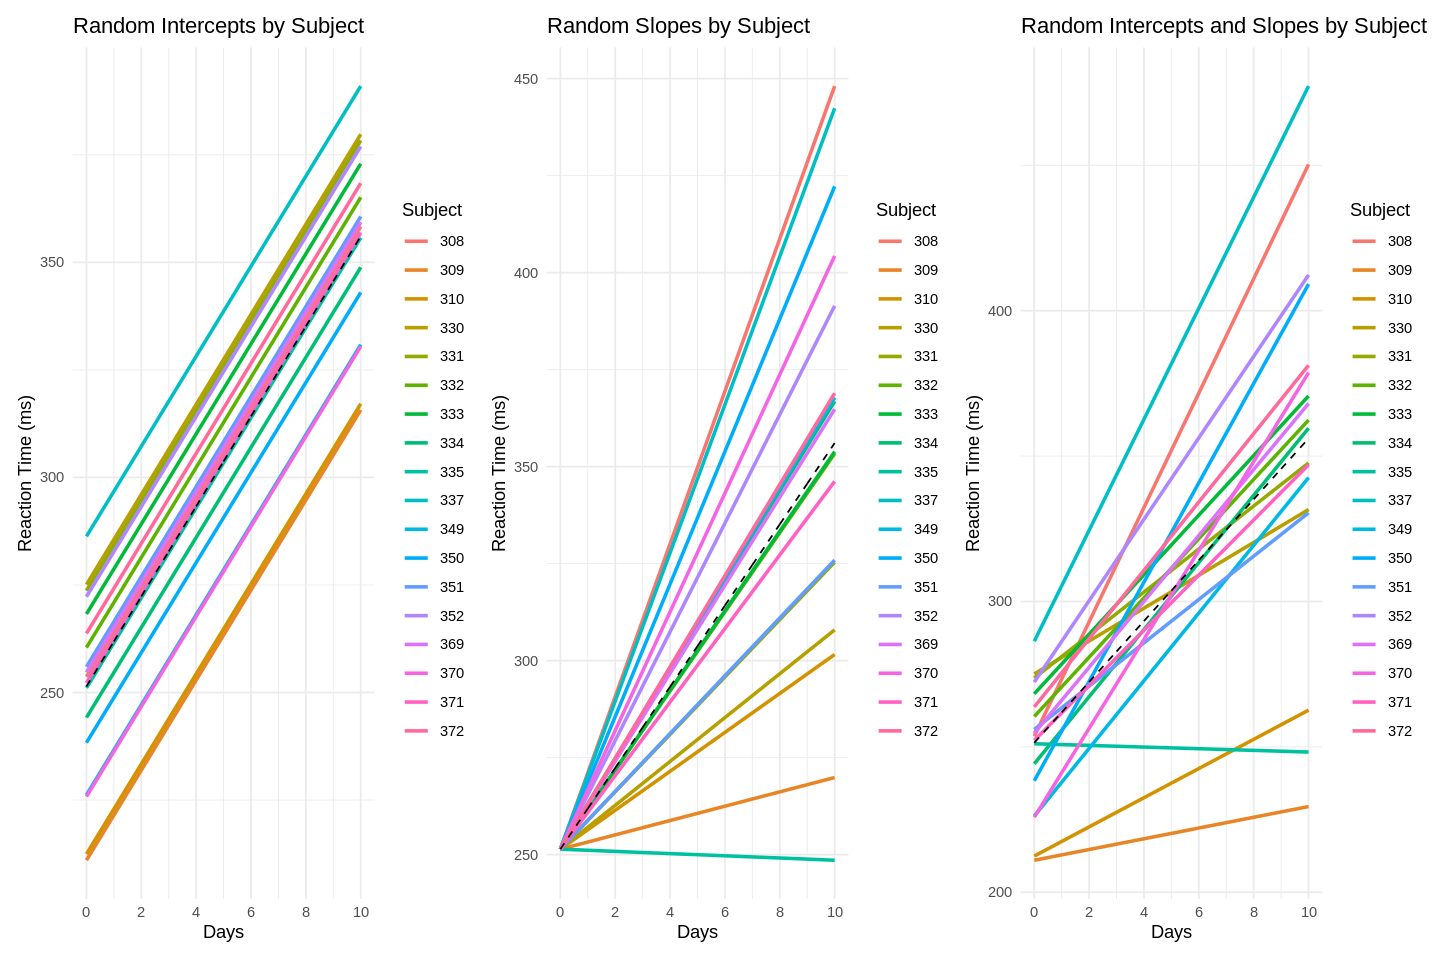

In [ ]:
# Load the sleepstudy dataset
data("sleepstudy", package = "lme4")

# Fit a linear mixed effects model
model <- lmer(Reaction ~ Days + (Days | Subject), data = sleepstudy)

# Summarize the model
summary(model)

# Extract fixed effects
fixed_effects <- fixef(model)

# Extract random effects
random_effects <- ranef(model)$Subject

# Prepare data for plotting random intercepts and slopes
random_intercepts <- data.frame(Subject = rownames(random_effects), Intercept = random_effects[["(Intercept)"]])
random_slopes <- data.frame(Subject = rownames(random_effects), Slope = random_effects[["Days"]])

# Create a dataset for the average fixed effect line
avg_line <- data.frame(
  Days = rep(0:10, each = nrow(random_intercepts)),
  Reaction = rep(fixed_effects[1], 11) + rep(fixed_effects[2], 11) * rep(0:10, each = nrow(random_intercepts)),
  Subject = rep(random_intercepts$Subject, each = 11)
)

# Create a dataset for the random intercept adjusted lines
intercept_lines <- random_intercepts %>%
  rowwise() %>%
  mutate(data = list(data.frame(Days = 0:10,
                                Reaction = fixed_effects[1] + Intercept + fixed_effects[2] * 0:10,
                                Subject_Intercept = Subject))) %>%
  unnest(data)

# Create a dataset for the random slope adjusted lines
slope_lines <- random_slopes %>%
  rowwise() %>%
  mutate(data = list(data.frame(Days = 0:10,
                                Reaction = fixed_effects[1] + fixed_effects[2] * 0:10 + Slope * 0:10,
                                Subject_Slope = Subject))) %>%
  unnest(data)

# Create a dataset for the random intercept and slope adjusted lines
intercept_slope_lines <- random_intercepts %>%
  left_join(random_slopes, by = "Subject") %>%
  rowwise() %>%
  mutate(data = list(data.frame(Days = 0:10,
                                Reaction = fixed_effects[1] + Intercept + (fixed_effects[2] + Slope) * 0:10,
                                Subject_Intercept_Slope = Subject))) %>%
  unnest(data)

# Plot random intercepts
p1 <- ggplot(intercept_lines, aes(x = Days, y = Reaction, group = Subject_Intercept, color = Subject_Intercept)) +
  geom_line(size = 1) +
  geom_line(data = avg_line, aes(x = Days, y = Reaction, group = Subject), color = "black", linetype = "dashed") +
  scale_x_continuous(breaks = seq(0, 10, by = 2)) +
  labs(title = "Random Intercepts by Subject",
       x = "Days",
       y = "Reaction Time (ms)",
       color = "Subject") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Plot random slopes
p2 <- ggplot(slope_lines, aes(x = Days, y = Reaction, group = Subject_Slope, color = Subject_Slope)) +
  geom_line(size = 1) +
  geom_line(data = avg_line, aes(x = Days, y = Reaction, group = Subject), color = "black", linetype = "dashed") +
  scale_x_continuous(breaks = seq(0, 10, by = 2)) +
  labs(title = "Random Slopes by Subject",
       x = "Days",
       y = "Reaction Time (ms)",
       color = "Subject") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Plot random intercepts and slopes
p3 <- ggplot(intercept_slope_lines, aes(x = Days, y = Reaction, group = Subject_Intercept_Slope, color = Subject_Intercept_Slope)) +
  geom_line(size = 1) +
  geom_line(data = avg_line, aes(x = Days, y = Reaction, group = Subject), color = "black", linetype = "dashed") +
  scale_x_continuous(breaks = seq(0, 10, by = 2)) +
  labs(title = "Random Intercepts and Slopes by Subject",
       x = "Days",
       y = "Reaction Time (ms)",
       color = "Subject") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

# Combine plots using patchwork
combined_plot <- p1 + p2 + p3
print(combined_plot)

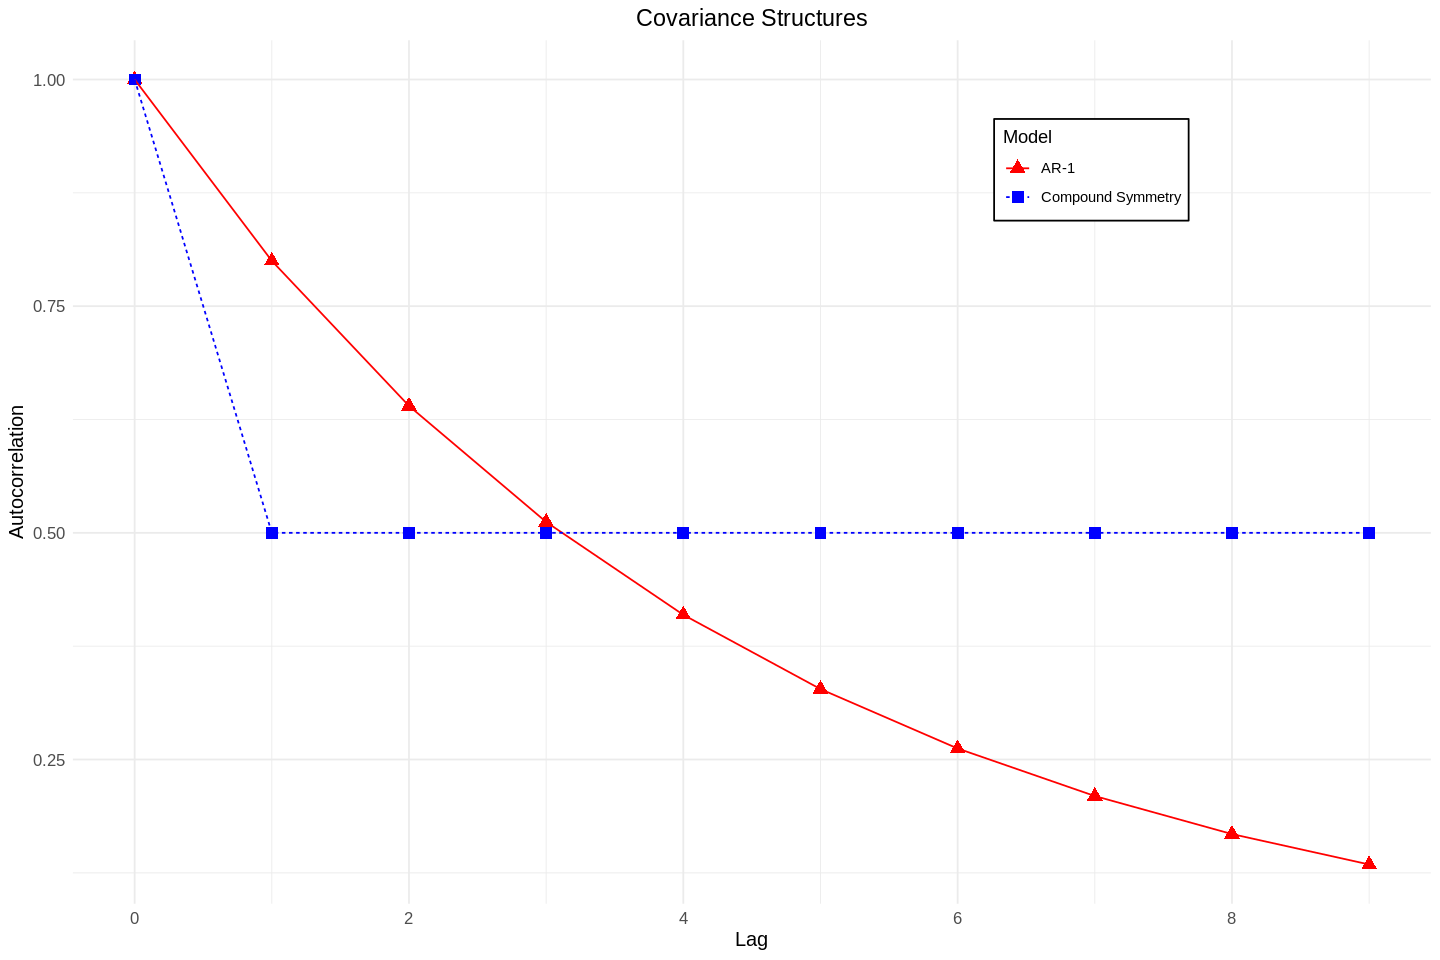

In [ ]:
# Set seed for reproducibility
set.seed(123)

# Define the number of time points
n <- 10

# Define the autocorrelation coefficients
rho_ar1 <- 0.8
rho_cs <- 0.5

# Simulate AR(1) structure
ar1_acf <- rho_ar1^(0:(n-1))

# Simulate compound symmetry structure
cs_acf <- rep(rho_cs, n)
cs_acf[1] <- 1  # Set first autocorrelation value to 1 for compound symmetry

# Create dataframes for plotting
ar1_df <- data.frame(Lag = 0:(n-1), ACF = ar1_acf, Model = "AR-1")
cs_df <- data.frame(Lag = 0:(n-1), ACF = cs_acf, Model = "Compound Symmetry")

# Combine dataframes
acf_df <- bind_rows(ar1_df, cs_df)

# Plot the correlogram
p <- ggplot(acf_df, aes(x = Lag, y = ACF, shape = Model, linetype = Model, color = Model)) +
  geom_point(size = 3) +
  geom_line() +
  scale_color_manual(values = c("AR-1" = "red", "Compound Symmetry" = "blue")) +
  scale_shape_manual(values = c("AR-1" = 17, "Compound Symmetry" = 15)) +  # 17 = triangle, 15 = square
  scale_x_continuous(breaks = seq(0, n-1, by = 2)) +  # Set x-ticks every 2 lags
  labs(title = "Covariance Structures",
       x = "Lag",
       y = "Autocorrelation") +
  theme_minimal() +
  theme(axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.position = c(0.75, 0.85),
        legend.background = element_rect(fill = "white", color = "black"))

print(p)